## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  99.363522  1340.711669  0.833946  3.398457  1.710453
1  59.534127  1445.080309  0.246588  8.150637  1.450286
2  23.655047   924.172459  0.944266  6.751251  1.517347
3  90.360808   913.120182  0.240551  4.578417  1.336761
4  40.738766  1133.843696  0.227530  7.578694  1.558190


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0027928	total: 57.8ms	remaining: 57.8s
1:	learn: 0.9941505	total: 58.4ms	remaining: 29.1s
2:	learn: 0.9863104	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9783780	total: 59.2ms	remaining: 14.8s
4:	learn: 0.9690644	total: 59.6ms	remaining: 11.9s
5:	learn: 0.9602321	total: 59.9ms	remaining: 9.93s
6:	learn: 0.9503543	total: 60.4ms	remaining: 8.57s
7:	learn: 0.9411398	total: 61.1ms	remaining: 7.58s
8:	learn: 0.9327380	total: 61.6ms	remaining: 6.78s
9:	learn: 0.9243780	total: 62.2ms	remaining: 6.16s
10:	learn: 0.9157744	total: 62.9ms	remaining: 5.65s
11:	learn: 0.9065596	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8991129	total: 63.8ms	remaining: 4.84s
13:	learn: 0.8917678	total: 64.3ms	remaining: 4.53s
14:	learn: 0.8840096	total: 64.8ms	remaining: 4.25s
15:	learn: 0.8765562	total: 65.1ms	remaining: 4s
16:	learn: 0.8685414	total: 65.7ms	remaining: 3.8s
17:	learn: 0.8597237	total: 66.1ms	remaining: 3.6s
18:	learn: 0.8537626	total: 66.4ms	remaining: 3.4

111:	learn: 0.4434172	total: 107ms	remaining: 849ms
112:	learn: 0.4416619	total: 108ms	remaining: 847ms
113:	learn: 0.4396557	total: 108ms	remaining: 842ms
114:	learn: 0.4378630	total: 109ms	remaining: 838ms
115:	learn: 0.4356721	total: 109ms	remaining: 833ms
116:	learn: 0.4326567	total: 110ms	remaining: 829ms
117:	learn: 0.4300029	total: 110ms	remaining: 824ms
118:	learn: 0.4281376	total: 111ms	remaining: 820ms
119:	learn: 0.4261644	total: 111ms	remaining: 814ms
120:	learn: 0.4242164	total: 111ms	remaining: 809ms
121:	learn: 0.4219095	total: 112ms	remaining: 806ms
122:	learn: 0.4200218	total: 112ms	remaining: 802ms
123:	learn: 0.4172709	total: 113ms	remaining: 798ms
124:	learn: 0.4147819	total: 114ms	remaining: 795ms
125:	learn: 0.4123895	total: 114ms	remaining: 790ms
126:	learn: 0.4096505	total: 114ms	remaining: 786ms
127:	learn: 0.4079474	total: 115ms	remaining: 782ms
128:	learn: 0.4061631	total: 115ms	remaining: 776ms
129:	learn: 0.4039751	total: 115ms	remaining: 772ms
130:	learn: 

286:	learn: 0.2129306	total: 186ms	remaining: 462ms
287:	learn: 0.2125156	total: 186ms	remaining: 461ms
288:	learn: 0.2119116	total: 187ms	remaining: 459ms
289:	learn: 0.2113053	total: 187ms	remaining: 459ms
290:	learn: 0.2108622	total: 188ms	remaining: 457ms
291:	learn: 0.2104605	total: 188ms	remaining: 456ms
292:	learn: 0.2101055	total: 189ms	remaining: 455ms
293:	learn: 0.2093460	total: 189ms	remaining: 454ms
294:	learn: 0.2088410	total: 190ms	remaining: 453ms
295:	learn: 0.2081006	total: 190ms	remaining: 451ms
296:	learn: 0.2076004	total: 190ms	remaining: 450ms
297:	learn: 0.2071516	total: 191ms	remaining: 449ms
298:	learn: 0.2067241	total: 191ms	remaining: 448ms
299:	learn: 0.2060162	total: 191ms	remaining: 447ms
300:	learn: 0.2055208	total: 192ms	remaining: 445ms
301:	learn: 0.2051532	total: 192ms	remaining: 444ms
302:	learn: 0.2042687	total: 193ms	remaining: 444ms
303:	learn: 0.2037526	total: 193ms	remaining: 443ms
304:	learn: 0.2028856	total: 194ms	remaining: 442ms
305:	learn: 

513:	learn: 0.1073326	total: 290ms	remaining: 274ms
514:	learn: 0.1072365	total: 291ms	remaining: 274ms
515:	learn: 0.1071419	total: 291ms	remaining: 273ms
516:	learn: 0.1068371	total: 292ms	remaining: 273ms
517:	learn: 0.1065643	total: 292ms	remaining: 272ms
518:	learn: 0.1064939	total: 293ms	remaining: 271ms
519:	learn: 0.1061935	total: 293ms	remaining: 271ms
520:	learn: 0.1055730	total: 293ms	remaining: 270ms
521:	learn: 0.1053668	total: 294ms	remaining: 269ms
522:	learn: 0.1050577	total: 294ms	remaining: 268ms
523:	learn: 0.1045271	total: 295ms	remaining: 268ms
524:	learn: 0.1043261	total: 295ms	remaining: 267ms
525:	learn: 0.1041513	total: 296ms	remaining: 267ms
526:	learn: 0.1037258	total: 296ms	remaining: 266ms
527:	learn: 0.1035766	total: 297ms	remaining: 265ms
528:	learn: 0.1033178	total: 297ms	remaining: 265ms
529:	learn: 0.1032341	total: 298ms	remaining: 264ms
530:	learn: 0.1029420	total: 298ms	remaining: 263ms
531:	learn: 0.1026473	total: 299ms	remaining: 263ms
532:	learn: 

681:	learn: 0.0680497	total: 369ms	remaining: 172ms
682:	learn: 0.0678152	total: 369ms	remaining: 171ms
683:	learn: 0.0675856	total: 370ms	remaining: 171ms
684:	learn: 0.0674075	total: 370ms	remaining: 170ms
685:	learn: 0.0672762	total: 370ms	remaining: 170ms
686:	learn: 0.0671156	total: 371ms	remaining: 169ms
687:	learn: 0.0668903	total: 371ms	remaining: 168ms
688:	learn: 0.0666388	total: 372ms	remaining: 168ms
689:	learn: 0.0664800	total: 372ms	remaining: 167ms
690:	learn: 0.0661595	total: 373ms	remaining: 167ms
691:	learn: 0.0658468	total: 373ms	remaining: 166ms
692:	learn: 0.0655419	total: 374ms	remaining: 166ms
693:	learn: 0.0652444	total: 374ms	remaining: 165ms
694:	learn: 0.0650330	total: 375ms	remaining: 165ms
695:	learn: 0.0648070	total: 375ms	remaining: 164ms
696:	learn: 0.0646376	total: 376ms	remaining: 163ms
697:	learn: 0.0644705	total: 386ms	remaining: 167ms
698:	learn: 0.0643043	total: 387ms	remaining: 167ms
699:	learn: 0.0640888	total: 388ms	remaining: 166ms
700:	learn: 

874:	learn: 0.0410554	total: 474ms	remaining: 67.7ms
875:	learn: 0.0410246	total: 474ms	remaining: 67.1ms
876:	learn: 0.0409319	total: 475ms	remaining: 66.6ms
877:	learn: 0.0409195	total: 475ms	remaining: 66ms
878:	learn: 0.0408891	total: 476ms	remaining: 65.5ms
879:	learn: 0.0407848	total: 476ms	remaining: 64.9ms
880:	learn: 0.0406936	total: 476ms	remaining: 64.3ms
881:	learn: 0.0405428	total: 477ms	remaining: 63.8ms
882:	learn: 0.0403696	total: 477ms	remaining: 63.2ms
883:	learn: 0.0403006	total: 477ms	remaining: 62.7ms
884:	learn: 0.0401554	total: 478ms	remaining: 62.1ms
885:	learn: 0.0399887	total: 478ms	remaining: 61.6ms
886:	learn: 0.0398860	total: 479ms	remaining: 61ms
887:	learn: 0.0398248	total: 479ms	remaining: 60.4ms
888:	learn: 0.0396855	total: 480ms	remaining: 59.9ms
889:	learn: 0.0395249	total: 480ms	remaining: 59.3ms
890:	learn: 0.0394238	total: 481ms	remaining: 58.8ms
891:	learn: 0.0393645	total: 481ms	remaining: 58.3ms
892:	learn: 0.0392976	total: 482ms	remaining: 57.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

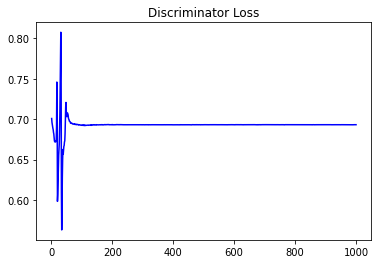

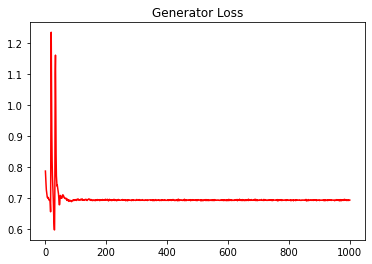

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2910263274419224


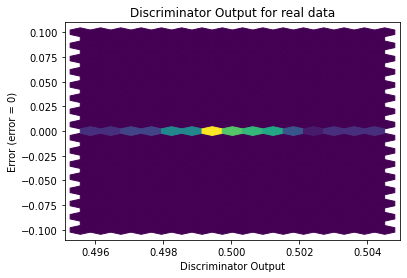

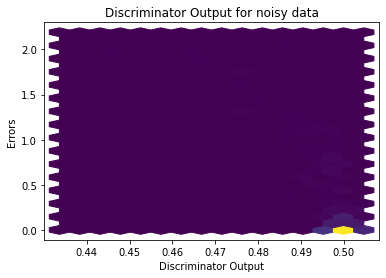

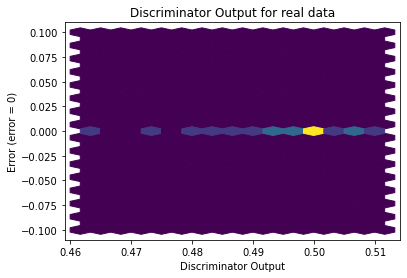

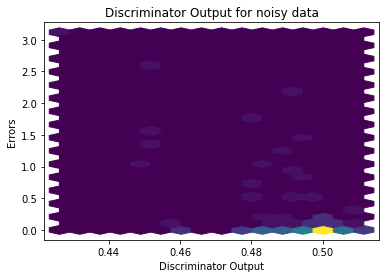

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


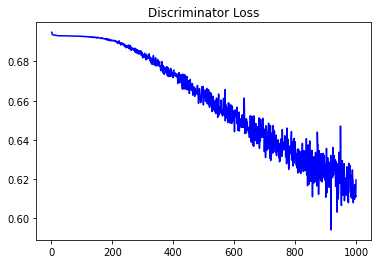

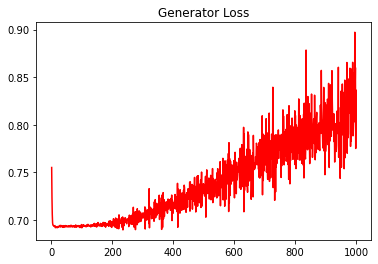

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.31161115066884565


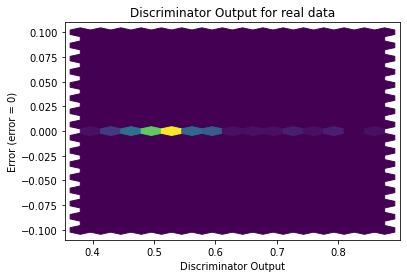

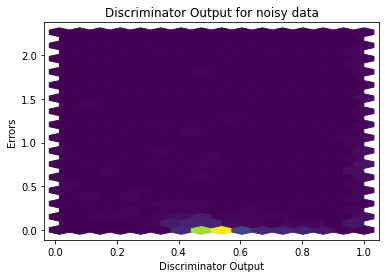

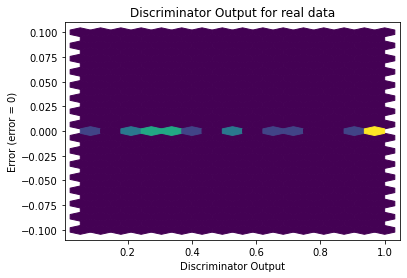

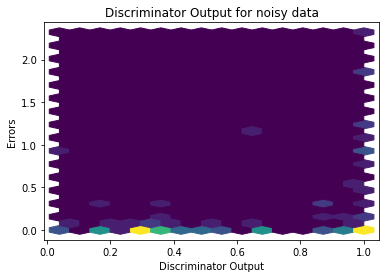

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
